#Solution to exercise 2: Probability distributions

##### August 2015

In [1]:
%%html
<style>
table {float:left}
</style>

####Question No 1.

The number of rainy days in July and August at a meteorological station is given in the table below.


Year|1|2|3|4|5|6|7|8|9|10|
---|---|---|---|---|---|---|---|---|---|---|
July| 10 |15|17 |8||9|19|14|20|4
August|4|9|8|3|0|10|12|2|8|6 

##### (1) Use the Hypergeometric, Binomial and Poisson distributions to calculate:

a) What is the probability of 10 rainy days in each of the months of July and August?

##Hypergeometric distributions

In [32]:
import scipy.stats
import math
from scipy.stats import hypergeom
k = 133 # number of "successes" in the population for July
k1= 62  # number of "successes" in the population for August
x = 10  # number of "successes" in the sample
N = 310 # size of the population
n = 31  # number sampled
hyper_July = hypergeom.pmf(x, N, n, k) 
hyper_Aug = hypergeom.pmf(x, N, n, k1) 
print 'Hypergeo_June = %.4f And Hypergeo_Aug = %.4f' % (hyper_July, hyper_Aug)


Hypergeo_June = 0.0704 And Hypergeo_Aug = 0.0385


###Binomial distribution 

In [33]:
from scipy.stats import binom
mean_july = 13.3  #total numbers of rainy days/total number of years
mean_aug  = 6.2
p_july    =  0.43 #probability of obtaining exactly x successes in august i.e mean/n
p_aug     =  0.2  
binom_july = binom.pmf(x,n,p_july)
binom_aug = binom.pmf(x,n,p_aug)
print 'Binomila_June = %.4f And Binomial_Aug = %.4f' % (binom_july, binom_aug)


Binomila_June = 0.0716 And Binomial_Aug = 0.0419


##Poisson Distribution

In [34]:
from scipy.stats import poisson
#poisson.pmf(x, λ)
lambda_july = 13.3   # lambda = p*n which is equivalents to mean
lambda_aug  = 6.2
poisson_july = poisson.pmf(x, lambda_july)
poisson_aug = poisson.pmf(x, lambda_aug)
print 'Poisson_June = %.4f And Poisson_Aug = %.4f' % (poisson_july, poisson_aug)

Poisson_June = 0.0799 And Poisson_Aug = 0.0469


##### b) What is the probability of 20 rainy days in the 2-month period? 

In [35]:
k_for_2_month = 195
x_for_2_month = 20
n_for_2_month = 62
p_for_2_month = 0.31
N_for_2_month = 620
lambda_for_2_month = 19.5
hyp_dist = hypergeom.pmf(x_for_2_month, N_for_2_month, n_for_2_month, k_for_2_month) 
bin_dist = binom.pmf(x_for_2_month,n_for_2_month,p_for_2_month)
poi_dist = poisson.pmf(x_for_2_month, lambda_for_2_month)
print 'Poisson Distribution = %.4f Hypergeometric Distribution = %.4f Binomial Distribution = %.4f'  % (poi_dist, hyp_dist, bin_dist)

Poisson Distribution = 0.0883 Hypergeometric Distribution = 0.1126 Binomial Distribution = 0.1054


##### (2) Which assumptions in each method are likely violated by this problem?
The Hypergeometric distribution represents the given situation best. It is a discrete probability distribution, which describes the number of successes in a sequence of n draws from a population without replacement. That means, that the probability p of a success is dependent on the result of the previous trial. It can easily be explained
when thinking of an urn with black and red marbles in it. Drawing a red one will be defined as success whereas drawing a black one will be defined as failure. After drawing one marble, one does not replace them into the urn. That means, that the probability for getting a red marbel will change from trial to trial, because the whole number of marbles changes all the time. Comparing that with the given task, that means, that the probability of rain for one day depends on the weather from all days before.

In contrast to that the Binomial distribution, which is also a discrete probability distribution, assumes, that the probability of success p is independent from trial to trial. But that also means, that if one increases the data set by one year, the probability changes. By looking on the urn experiment, that means, that after drawing a marble
one replaces it before drawing the next one. So the Binomial distribution can just be seen as an approximation of the Hypergeometric distribution.

When the Hypergeometric distribution can be approximated by a Binomial distribution, the Binomial distribution can be approximated by a Poisson distribution. This is also a discrete probability distribution, which can be used, to describe the probability of a number of events occurring in a fixed time, when they occur with a known average rate. They also have to be independent from time since the last event. Comparing thePoisson distribution with the Binomial distribution, the Poisson variable λ is equal to n ∗ p as mentioned above. But the approximation will be bad, if λ is big, while the sample size n is relatively small.


##### (3) What is the probability that the sixth rainy day of August occurs on 30 August?

The probability that the sixth rainy day of August occurs on the 30th August is found by using the Negative Binomial distribution and defined as:

$f_{x}(x; k,p) = \binom{x-1}{k-1} p^{k} q^{x-k} $


Here, Given:
probability of success in the population (p) = $\frac{62}{310}$ = 0.2
 where 62 is the sum of rainy days in August. The event of no success in the population is 1-0.2 = 0.8. 
 
 Now the equation becomes: 
 
 $f_{x}(x; k,p) = \binom{30-1}{6-1} .02^{6} 0.8^{30-6} $
 
 
To solve this equation from python:


In [36]:
round(math.factorial(29)/(math.factorial(24)*math.factorial(5))*(0.2**6)*(0.8**24),4)


0.0359

That means, that the probability of having the 6th rainy days on August 30 is 0.0359

##### II. Some politician (who obviously did not go a statistic course) tells the public that the town will be  well prepared to tackle the problems associated with a 10-year flood and that there is nothing to worry about for the next 9 years. In 10th year, when the flood will occur as he says, the local flood protection authority will have prepared everything. Compute the probability that the politician actually is right and that the 10-year flood occurs in tenth year for the first time.

##### Solution

Sience it is a 10-year flood, the time interval T is equal to 10. That means, that the probability  p = $\frac{1}{10}$ = 0.1. For the calculation one has to use the geometric distribution, because it is said, that the first success shall occur on the tenth trial.

$f_{x}(x; p)$ = p*q(x-1)

$f_{x}(10; 0.1)$ = 0.1(1 − 0.1)¹⁰⁻¹

= 0.0387


##### Alternatively this problem can be solved directly by using the python function which is given below:

In [37]:
from scipy.stats import geom
from __future__ import division
T = 10
P = 0.1
round(geom.pmf(T, P),4)

0.0387

That means, that the probability for the first flood occuring in the tenth year is 0.0387

##### III. Assume that the annual maxima discharges in a river station are normally distributed with a mean of 75 m³ /s and a standard deviation     of 10 m³ /s. What is the probability for any given year to have a maximum flow that is 

a) less than 70 m³/s? 

b) larger than 95 m³/s? 

c) between 60 and 80 m³/s? 

d) What is the flow with 90 % chance to not exceed? 

e) What is the flow with 80 % chance to exceed? 

f) In which interval (centred on the mean) would 50 % of the flows fall?



It is assumed that the annual maximum discharges at a river station are normally distributed with a mean of 75 m³/s and standard deviation of 10 m³/s, N(75,10)

To find the probabilities the normal distributed observed data is standardized, and the Z value is found in the normal distribution table:


Z = $\frac{x-\mu }{\sigma }$, N(0,1)²


#####a) less than 70 m³/s?

Given,

$\mu$ = 75 m³/s

$\sigma$ = 10 m³/s

P(Z<70) =  P(Z < $\frac{70-75 }{10 }$) = P(Z<-0.5)

From the python for standard normal distribution

scipy.stats.norm.cdf(0.5) = 0.691

for P(Z<0.5)



In [38]:
round(scipy.stats.norm.cdf(0.5),3)

0.691

So,

P(X<70) = 1- 0.691

= 0.308

That means, that the probability for getting a maximum flow in any given year is 0.309 or 30.9%


##### Alternatively this problem can be solved directly by using the python function which is given below:

In [39]:
a = round(scipy.stats.norm(75, 10).cdf(70),4)
print ('Probability for getting flow less then 70 m³/s is    : %.3f' % a)

Probability for getting flow less then 70 m³/s is    : 0.308


##### b) larger than 95 m³/s?

Transforming it in to standard normal distribution and calculating the probability, one obtains

Z = $\frac{95 - 75 }{10}$ = 2

P(X>95) = P(Z>2)
       
   = 1-P(Z $\leq$ 2)
   
   = 1-P(Z<2)

In [40]:
round(scipy.stats.norm.cdf(2),4)
# You can also use the standard normal distribution table from the link:
# https://en.wikipedia.org/wiki/Standard_normal_table#Cumulative

0.9772

 = 1 − 0.9772
 
 P(X>95) = 0.0228
 
 So the proability for getting a maximum flow in any given year is 0.0288 or 2,88%.

##### c) is between 60 and 80 m 3 /s?

P(60 <X< 80)

P (60 < X < 80) = P (X < 80) − P (X < 60)

$ Z_{60} $ = $\frac{60 - 75 }{10}$ = -1.5

$ Z_{80} $ = $\frac{80 - 75 }{10}$ = 0.5

P (X < 80) − P (X < 60) = P (Z < 0.5) − P (Z < −1.5)



In [41]:
round(scipy.stats.norm.cdf(0.5) - scipy.stats.norm.cdf(-1.5),4)

0.6247

So the proability for getting a maximum flow in between 60 and 80 m³/s is 0.6247 or 62.47%

##### d) What is the flow with 90 % chance to not exceed?

Now the question is exactly the other way round. That means, the probability is given and one has to find out the flow. Therefore one first has to look in the table for the standard normal distribution where it becomes 0.9. One gets:

$Z_{1.28}$ = 0.8997

$Z_{1.29}$ = 0.9015

So there is no exact value for Z at the point 0.9. Therefore one has to use linear regression to get the value for Z = 0.9:

$\frac{1.29 - 1.28 }{0.9015 − 0.8997}$ = $\frac{Z − 1.28}{0.9 − 0.8997}$

Z = $\frac{0.01 ∗ 0.0003}{0.0018} + 1.28$

Z = 1.2817

Now one has to retransform the standard normal distribution into just a normal distribution:

Z = $\frac{x-\mu }{\sigma }$

X = Z ∗ σ + μ

X = (1.2817 ∗ 10 + 75) m³/s

X = 87.82 m³/s

##### Alternatively this problem can be solved directly by using the python function which is given below:


In [42]:
d = scipy.stats.norm(75, 10).ppf(0.9)
print ('The flow with 90 pct chance not to exceed is : %.2f' % d)

The flow with 90 pct chance not to exceed is : 87.82


That means, that the flow with 90% chance not to exceed is 87.82 m³/s.

##### e) Flow with 80% chance to exceed

The way to calculate is nearly the same as in the task above:

P(X>x) = 0.8 

$Z_{0.84}$ = 0.7995

$Z_{0.85}$ = 0.8023

$\frac{0.85 − 0.84 }{0.8023 − 0.7995}$ = $\frac{Z − 0.84}{0 .8 − 0.7995}$

Z = 0.8418

To get really the probability one is looking for, one takes Z = −0, 8418, because P (Z < −z) = 1 − P (Z < z) (whereas z is a positiv number).

X = (−0.8418 ∗ 10 + 75) m³/s

X = 66.58 m³/s

##### Alternatively this problem can be solved directly by using the python function which is given below:


In [43]:
e = scipy.stats.norm(75, 10).ppf(1-0.8)
print ('The flow with 80 pct chance to exceed is     : %.2f' % e)

The flow with 80 pct chance to exceed is     : 66.58


The flow with 80% chance to exceed is 66.58 m³/s.

##### f) In which interval (centred on the mean) would 50 % of the flows fall

P (X < x < Y ) = 0.5 
P (Y < x) − P (X < x) = 0.5 
P (X < x) = 0.75

$Z_{0.67}$ = 0.7486

$Z_{0.68}$ = 0.7517

$\frac{0.68 − 0.67 }{0.7517 − 0.7486}$ = $\frac{Z − 0.67}{0.75 − 0.7486}$

$Z_{upper}$= 0.6745

$Z_{lower}$= −1 ∗ Z upper = −0.6745

X = (−0.6745 ∗ 10 + 75) m 3 /s = 68.26 m³ /s

Y = (0.6745 ∗ 10 + 75) m 3 /s = 81.74 m³/s

##### Alternatively this problem can be solved directly by using the python function which is given below:

In [44]:
l = scipy.stats.norm(75, 10).ppf(0.25) 
u = scipy.stats.norm(75, 10).ppf(0.75)
print 'Lower  = %.2f And Upper = %.2f' % (l, u)

Lower  = 68.26 And Upper = 81.74


The interval for 50% of the flow centred on the mean is [68.26 m³ /s; 81.74 m³/s].

##### IV. Plot the individual terms of the Poisson distribution for λ  = 3. Approximate the Poisson by the normal and plot the normal approximations on the same graph. Optional: Do the same but with λ = 8.

lambda (λ ) = 3

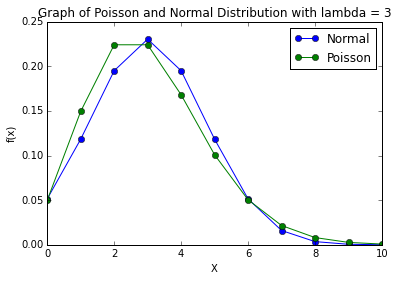

In [45]:
%matplotlib inline
import pandas as pd
import scipy.stats
from scipy.stats import poisson
import matplotlib.pyplot as plt
import math
from pandas import *
Normal= Series(scipy.stats.norm(3, math.sqrt(3)).pdf(range(11))) # Normal distribution
Poisson = Series(poisson.pmf(range(11), 3))                      # Poisson distribution
all_3 = pd.concat([Normal, Poisson], axis = 1)
plt.plot((all_3),linestyle = "solid", marker="o")
plt.legend(['Normal', 'Poisson'], loc='upper right') 
plt.xlabel('X') 
plt.ylabel('f(x)') 
plt.title('Graph of Poisson and Normal Distribution with lambda = 3') 
plt.show()

lambda (λ ) = 8

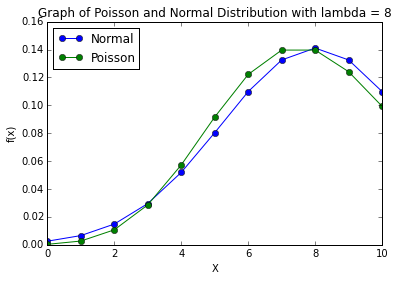

In [46]:
Normal= Series(scipy.stats.norm(8, math.sqrt(8)).pdf(range(11))) # Normal distribution
Poisson = Series(poisson.pmf(range(11), 8))                      # Poisson distribution
all_8 = pd.concat([Normal, Poisson], axis = 1)
plt.plot((all_8),linestyle = "solid", marker="o")
plt.legend(['Normal', 'Poisson'], loc='upper left') 
plt.xlabel('X') 
plt.ylabel('f(x)') 
plt.title('Graph of Poisson and Normal Distribution with lambda = 8') 
plt.show()